In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Display the first few rows of the dataset to understand its structure
print("Train Dataset")
print(train.head())

Train Dataset
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [ ]:
# Check for missing values in the training dataset
train_missing = train.isnull().sum()
print("\nMissing values in Train Dataset")
print(train_missing)


Missing values in Train Dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Data Cleaning
# Impute missing Age values with the median
train['Age'].fillna(train['Age'].median(), inplace=True)

In [ ]:
# Create a new feature 'HasCabin' indicating whether a passenger had a cabin or not
train['HasCabin'] = train['Cabin'].notna().astype(int)

In [ ]:
# Drop the Cabin column
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Impute missing Embarked values with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [ ]:
# Check if all missing values are handled
train_missing_after_cleaning = train.isnull().sum()
print("\nMissing values in Train Dataset after Cleaning")
print(train_missing_after_cleaning)


Missing values in Train Dataset after Cleaning
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


In [ ]:
# Plot distribution of Age
sns.histplot(train['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age')

In [ ]:
# Plot distribution of Fare
sns.histplot(train['Fare'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Fare')

Text(0.5, 1.0, 'Distribution of Fare')

In [ ]:
# Plot count plot of Pclass
sns.countplot(x='Pclass', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Count of Pclass')

Text(0.5, 1.0, 'Count of Pclass')

In [ ]:
# Plot count plot of Sex
sns.countplot(x='Sex', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Count of Sex')

Text(0.5, 1.0, 'Count of Sex')

In [ ]:
# Plot count plot of SibSp
sns.countplot(x='SibSp', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Count of SibSp')

Text(0.5, 1.0, 'Count of SibSp')

In [ ]:
# Plot count plot of Parch
sns.countplot(x='Parch', data=train, ax=axes[1, 2])
axes[1, 2].set_title('Count of Parch')

Text(0.5, 1.0, 'Count of Parch')

In [ ]:
# Plot count plot of Embarked
sns.countplot(x='Embarked', data=train, ax=axes[2, 0])
axes[2, 0].set_title('Count of Embarked')

Text(0.5, 1.0, 'Count of Embarked')

In [ ]:
# Plot count plot of HasCabin
sns.countplot(x='HasCabin', data=train, ax=axes[2, 1])
axes[2, 1].set_title('Count of HasCabin')

Text(0.5, 1.0, 'Count of HasCabin')

In [ ]:
# Plot survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train, ax=axes[2, 2])
axes[2, 2].set_title('Survival Rate by Pclass')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

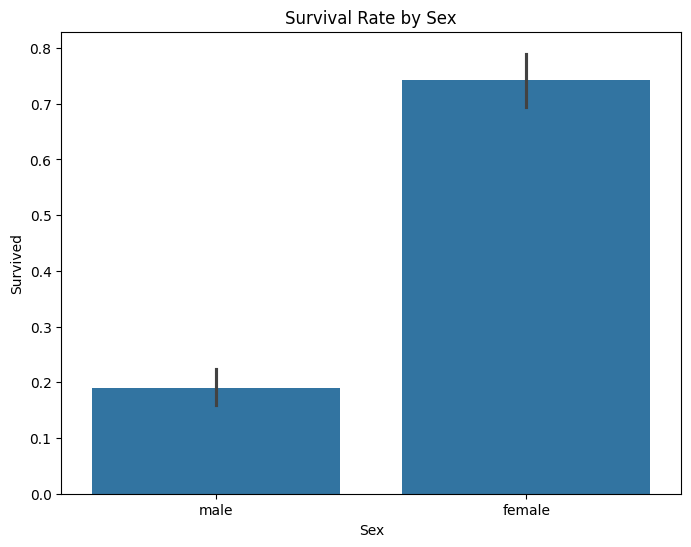

In [ ]:
# Survival rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()

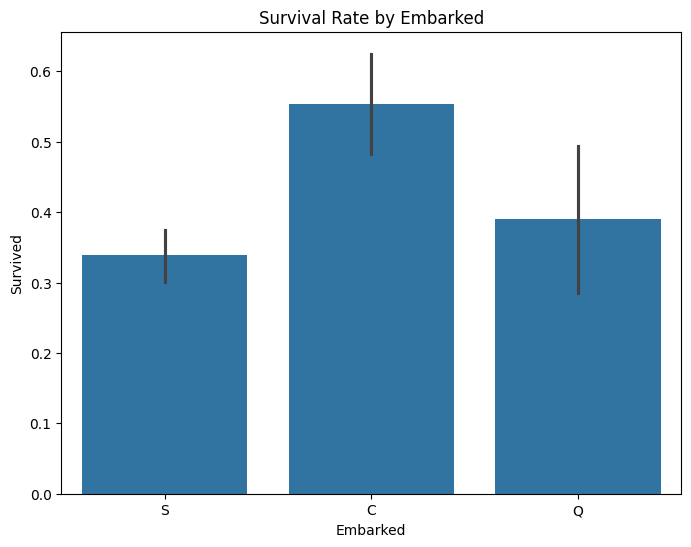

In [ ]:
# Survival rate by Embarked
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarked')
plt.show()

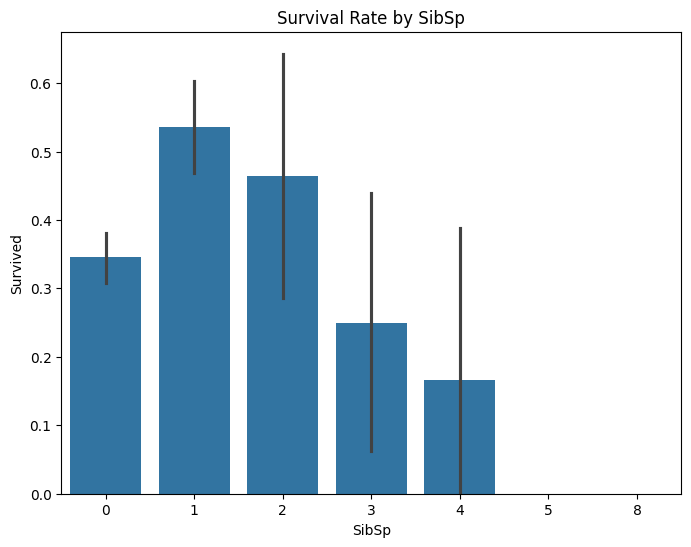

In [ ]:
# Survival rate by SibSp
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=train)
plt.title('Survival Rate by SibSp')
plt.show()

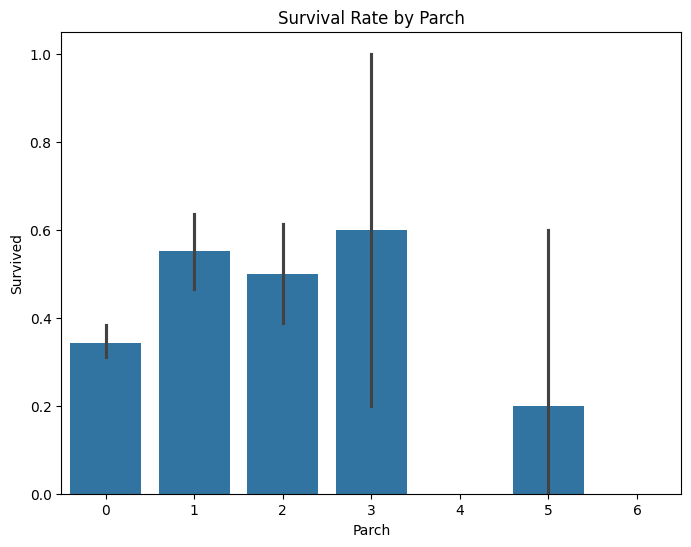

In [ ]:
# Survival rate by Parch
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=train)
plt.title('Survival Rate by Parch')
plt.show()

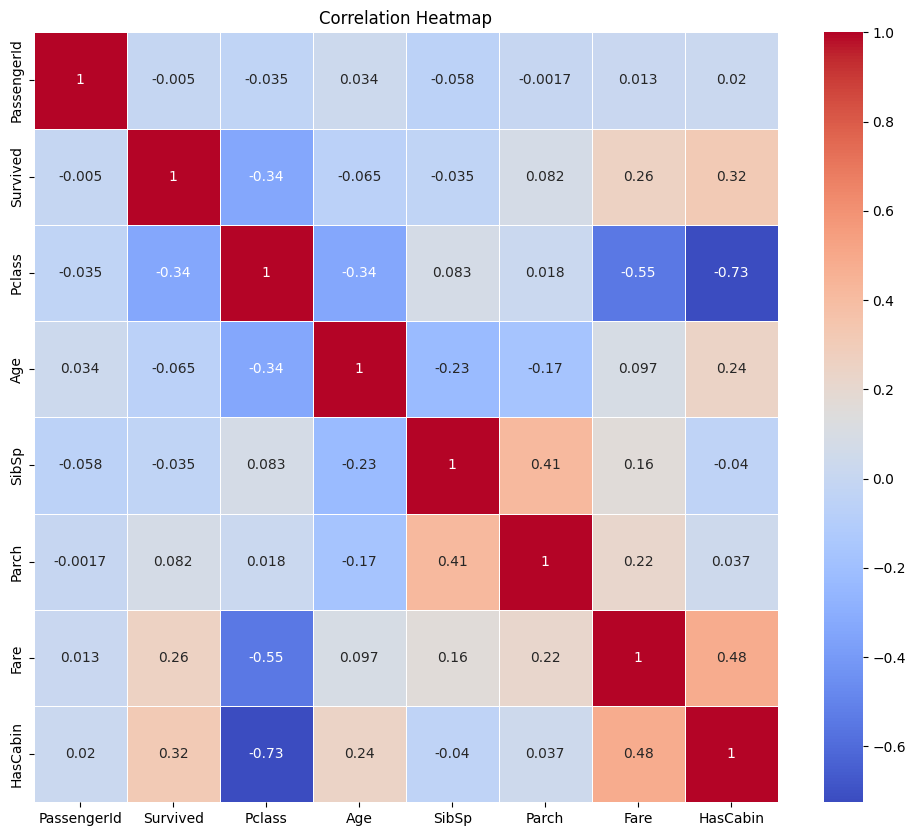

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
numeric_train = train.select_dtypes(include=['number'])
sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

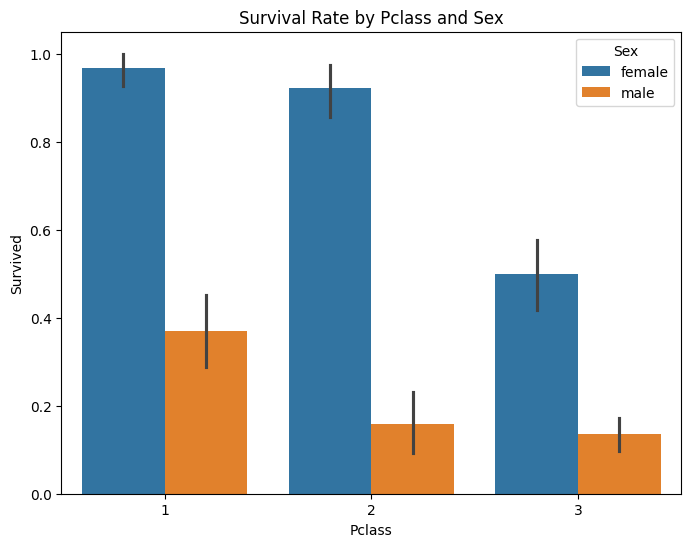

In [ ]:
# Survival rate by Pclass and Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.title('Survival Rate by Pclass and Sex')
plt.show()

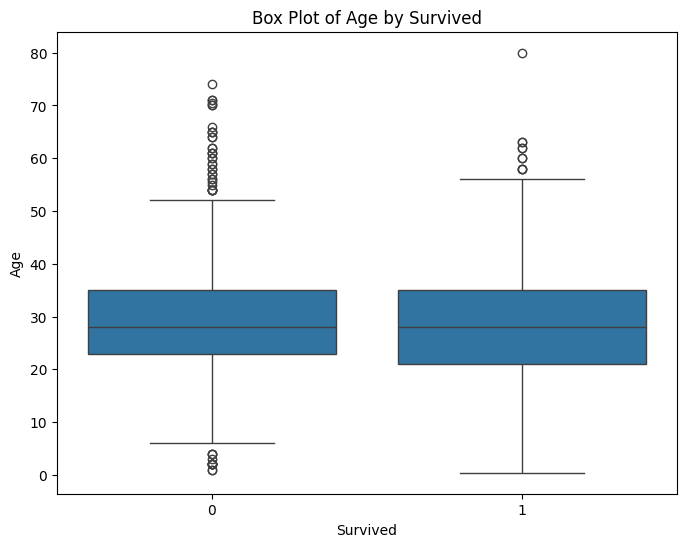

In [ ]:
# Box plot of Age by Survived
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Box Plot of Age by Survived')
plt.show()


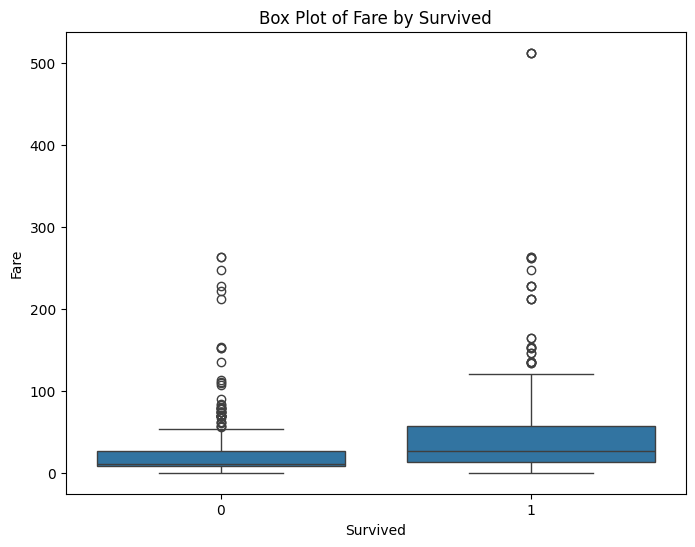

In [ ]:
# Box plot of Fare by Survived
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Box Plot of Fare by Survived')
plt.show()

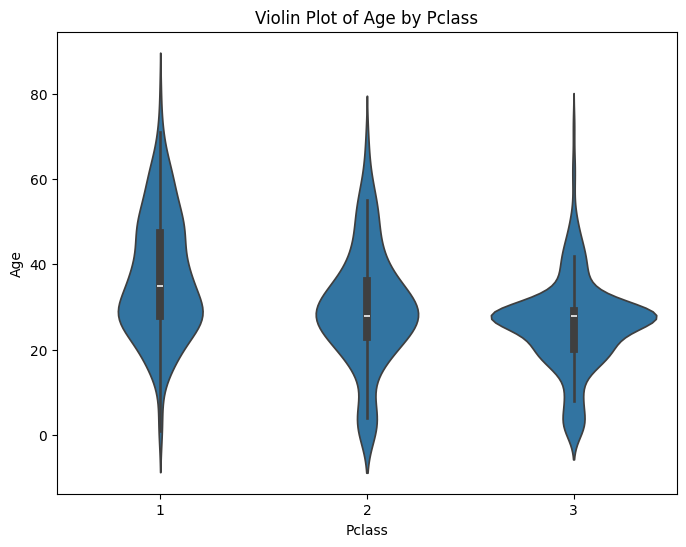

In [ ]:
# Violin plot of Age by Pclass
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', data=train)
plt.title('Violin Plot of Age by Pclass')
plt.show()

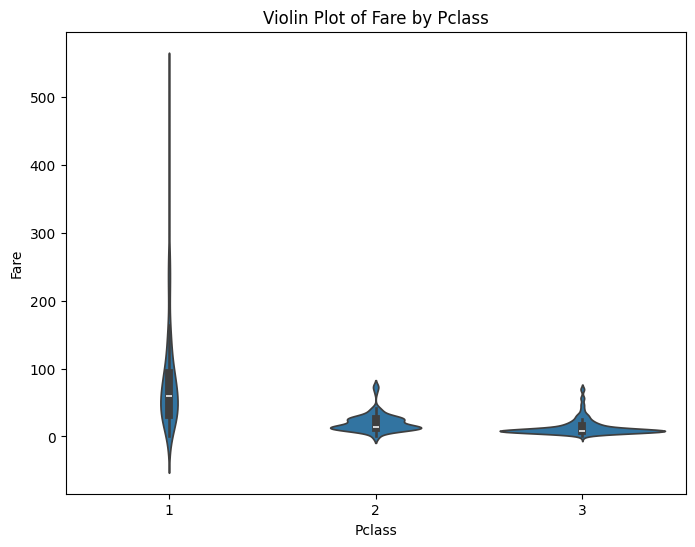

In [ ]:
# Violin plot of Fare by Pclass
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Fare', data=train)
plt.title('Violin Plot of Fare by Pclass')
plt.show()

In [ ]:
# Pairplot for selected features
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_selected = train[selected_features].copy()

In [ ]:
# Convert categorical variables to numeric
train_selected['Sex'] = train_selected['Sex'].map({'male': 0, 'female': 1})
train_selected['Embarked'] = train_selected['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

<Figure size 1500x1000 with 0 Axes>

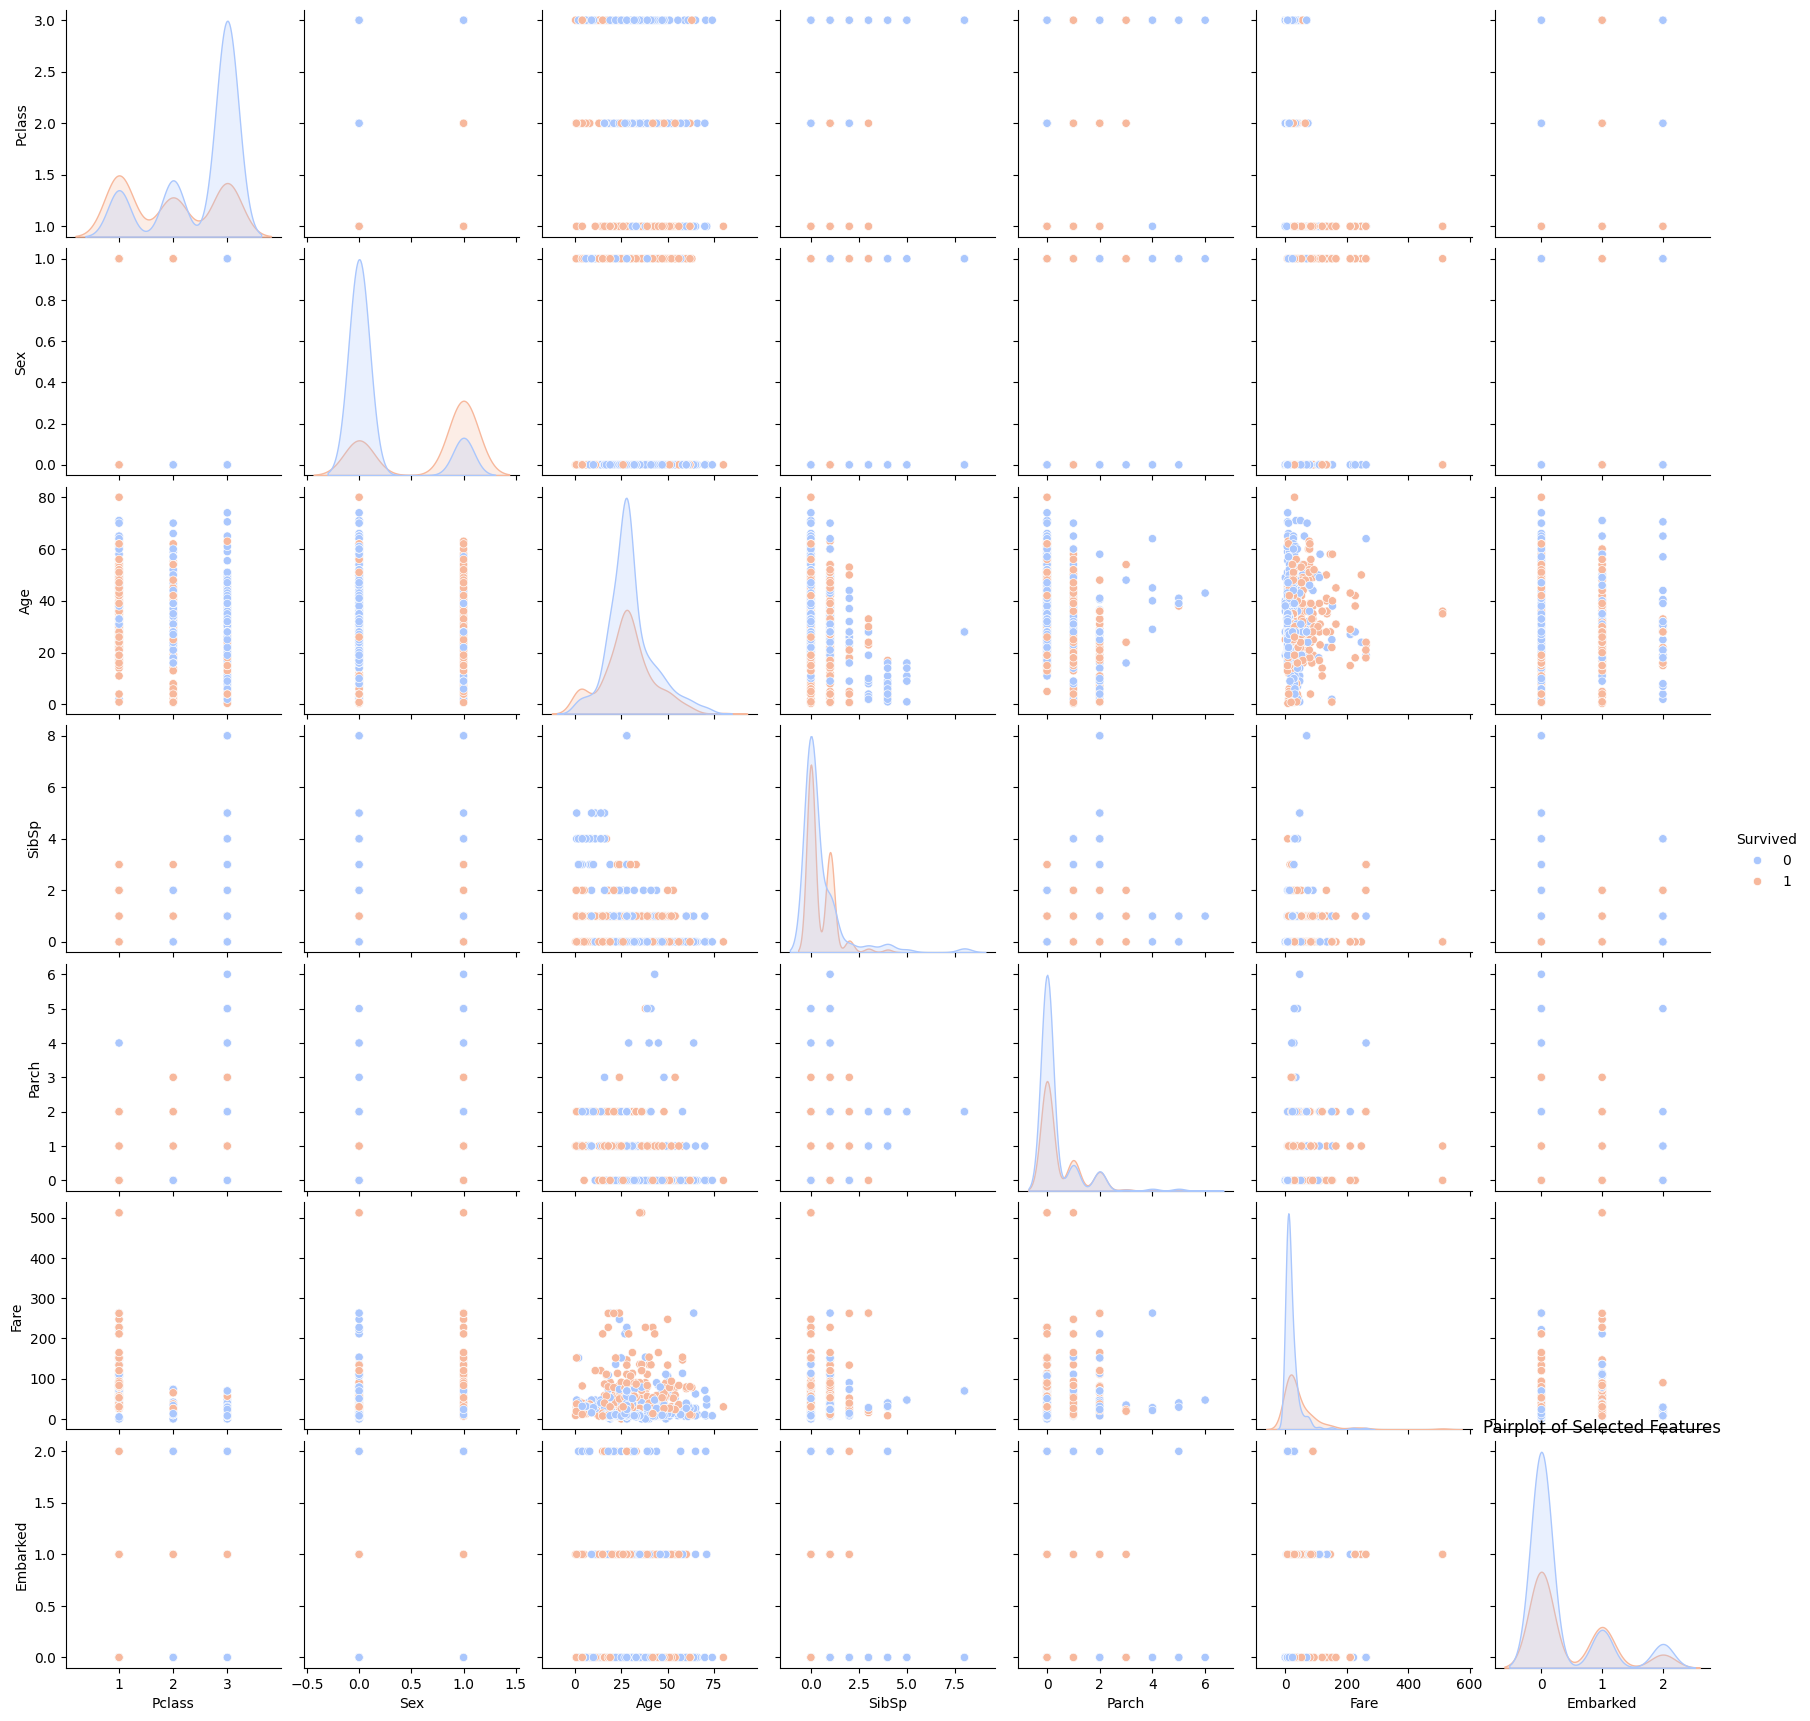

In [ ]:
plt.figure(figsize=(15, 10))
sns.pairplot(train_selected, hue='Survived', palette='coolwarm')
plt.title('Pairplot of Selected Features')
plt.show()

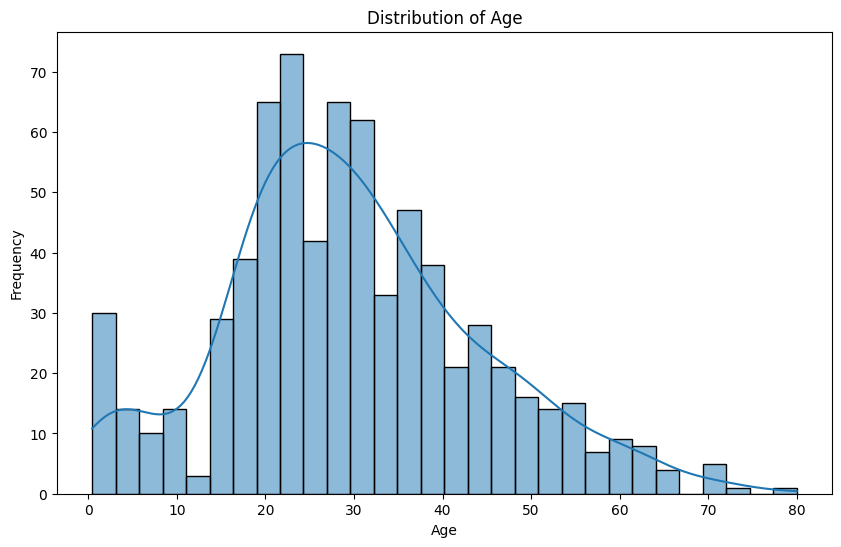

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-07423fac1315>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=train, palette='viridis')


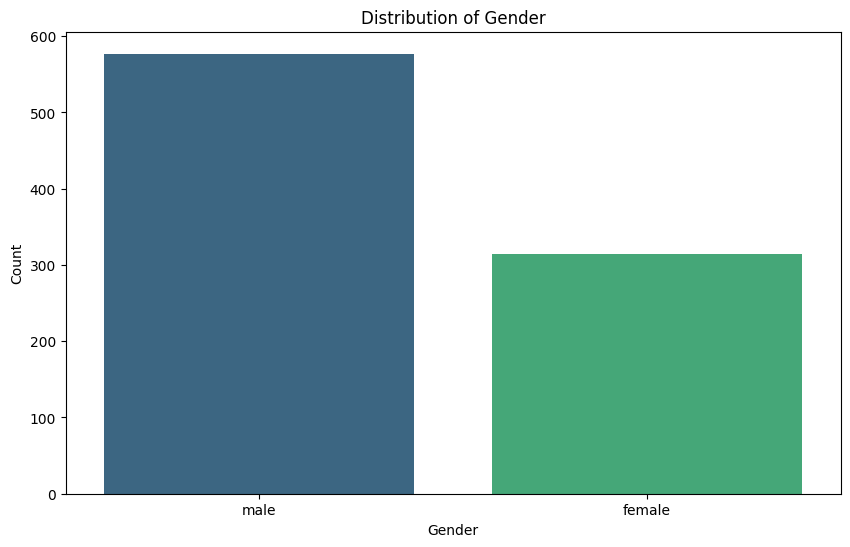

In [ ]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


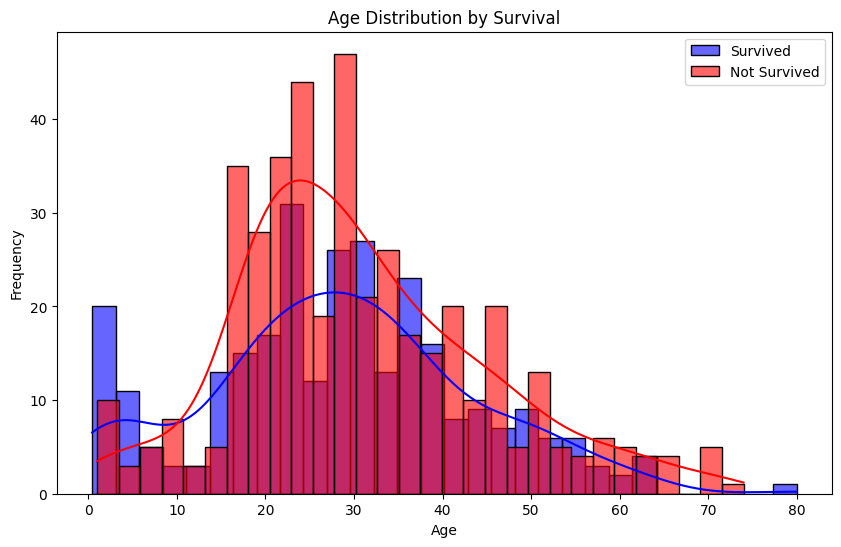

In [ ]:
# Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(train[train['Survived'] == 1]['Age'], kde=True, bins=30, color='blue', label='Survived', alpha=0.6)
sns.histplot(train[train['Survived'] == 0]['Age'], kde=True, bins=30, color='red', label='Not Survived', alpha=0.6)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

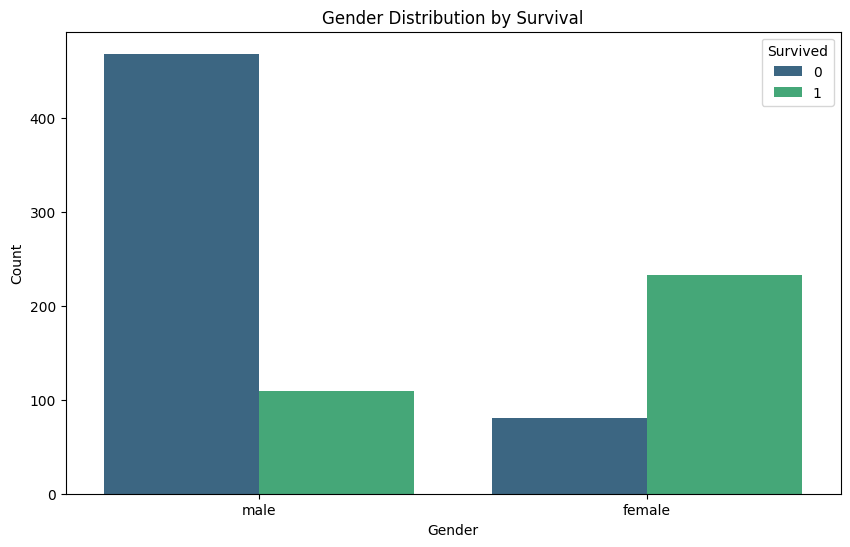

In [ ]:
# Gender Distribution by Survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=train, palette='viridis')
plt.title('Gender Distribution by Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()